<a href="https://colab.research.google.com/github/jamyooes/ML_Learnings/blob/main/Geron/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 Geron's End to End ML Project

In [108]:
# Importing basic packages
import sys
import sklearn

# Loading the Data

In [109]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [110]:
housing_df = housing.copy()

# Preliminary EDA

In [111]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [112]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [113]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [114]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Graphing relationships

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

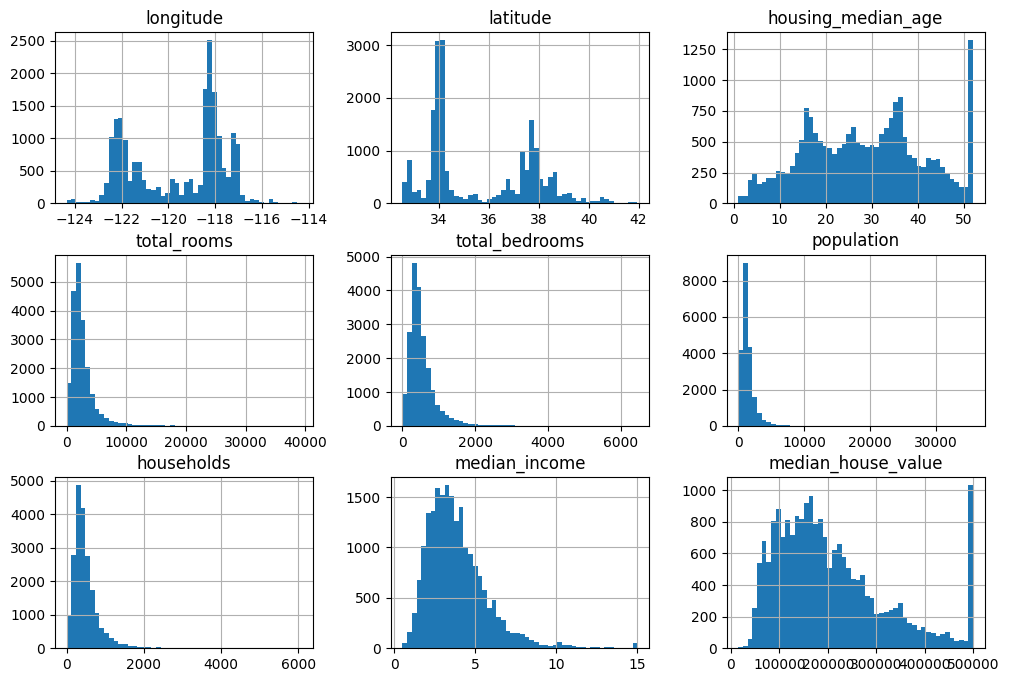

In [115]:
housing.hist(bins=50, figsize=(12, 8))

<Axes: ylabel='Count'>

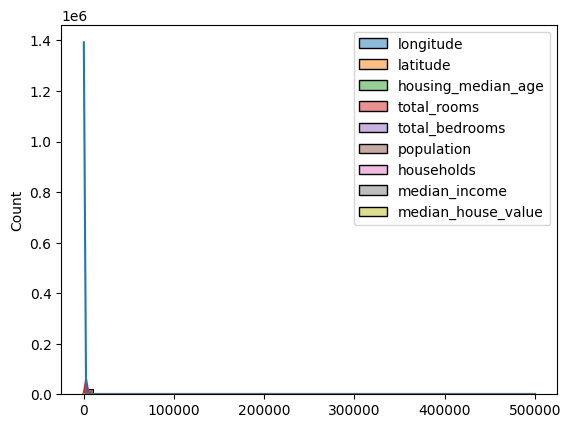

In [116]:
# My own idea you can only create one graph, I guess I should focus on 1 feature on seaborn with this command
# I think the better approach is looping or looking for another command in sns
import seaborn as sns
sns.histplot(data = housing, kde = True, bins = 50)

# Test set

In [117]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [118]:
# My extra code - simply to check the length of the data
print("Length of total dataset: ", len(housing))
print("Length of training dataset: ", len(train_set))
print("Length of testing dataset: ", len(test_set))

Length of total dataset:  20640
Length of training dataset:  16512
Length of testing dataset:  4128


# In-depth EDA

In [119]:
import matplotlib.pyplot as plt


[]

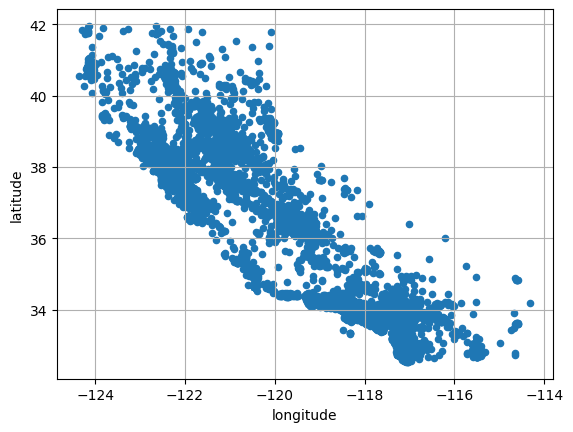

In [120]:
train_set.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True)
plt.plot()

[]

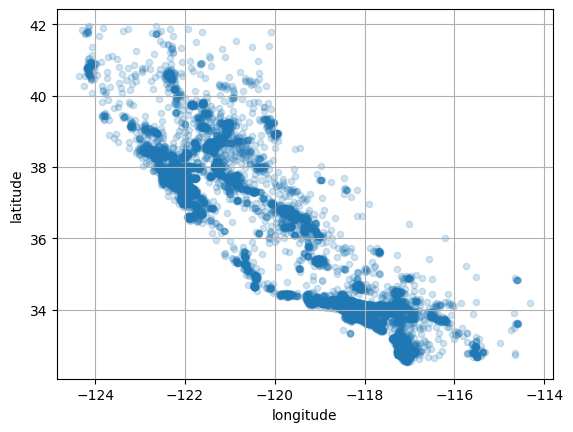

In [121]:
# Plotting coordinates and making denser points more apparent
train_set.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
plt.plot()

In [122]:
housing["population"]

,population
0,322.0
1,2401.0
2,496.0
3,558.0
4,565.0
...,...
20635,845.0
20636,356.0
20637,1007.0
20638,741.0


<Axes: xlabel='longitude', ylabel='latitude'>

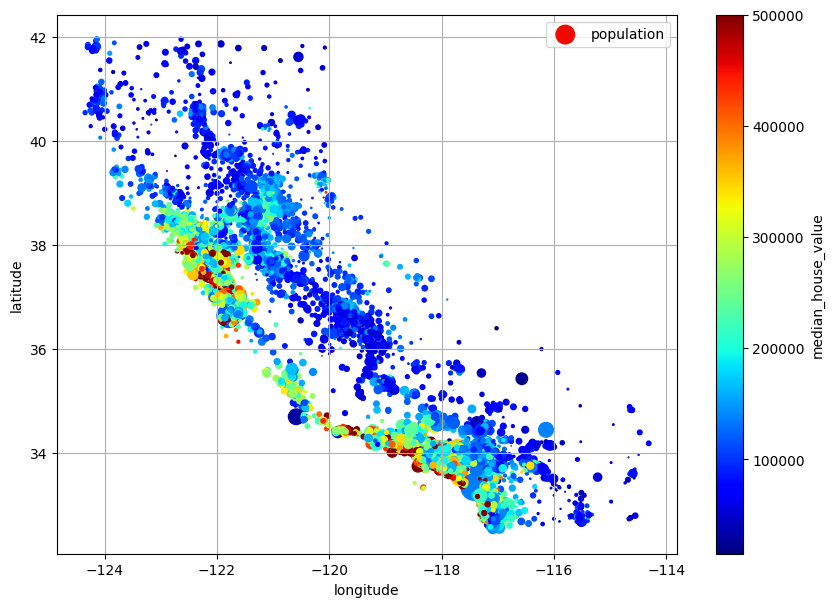

In [123]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", cmap = "jet", grid = True,
             legend = True, figsize = (10, 7), s = housing["population"] / 100,
             label = "population", colorbar = True, c = "median_house_value")

In [124]:
import numpy as np
np.random.seed(42)

# Correlations

In [125]:
corr_matrix = housing.corr(numeric_only= True) # relationships between variables trends

In [126]:
corr_matrix["median_house_value"].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


Use the highest values from corr for better visualization of relationships between the target (housing prices) and the other columns

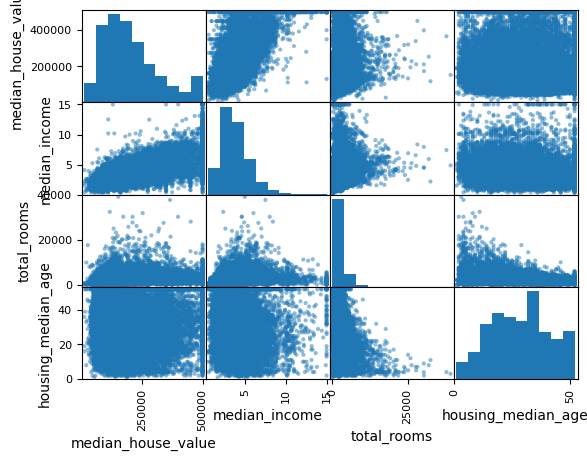

In [127]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]])
plt.show()

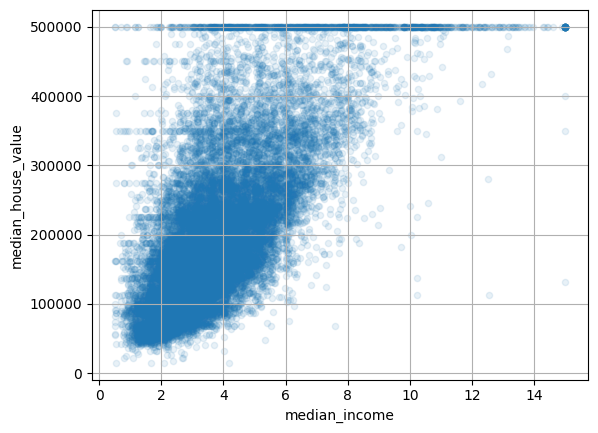

In [128]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, grid = True)
plt.show()

# Feature Engineering experiments from the book

In [129]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [130]:
housing["households"].head(2)

,households
0,126.0
1,1138.0


In [131]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [132]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_house,-0.023737
population,-0.024650
longitude,-0.045967


In [133]:
housing_df_feats = housing_df.drop("median_house_value", axis = 1)
housing_df_target = housing_df["median_house_value"]

In [134]:
housing_df_feats.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0


In [135]:
housing_num_feat = housing_df_feats.select_dtypes(include = [np.number])

## Imputation for missing values

Drop a column if the fill rate is too low

Remove the missing data if the amount of data is low?

Imputation -> average/median for numerical features and perhaps mode for categorical features

In [136]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [137]:
imputer.fit(housing_num_feat)

SimpleImputer(strategy='median')

In [138]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348])

In [139]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [140]:
X = imputer.transform(housing_num_feat)

In [141]:
housing_tran = pd.DataFrame(X, columns = housing_num_feat.columns, index = housing_num_feat.index)

## Outliers

In [142]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state = 42)
outlier_pred = isolation_forest.fit_predict(X)

In [143]:
isolation_canddidates = housing.iloc[outlier_pred]

In [144]:
isolation_canddidates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,0.221185,2.616981
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


# Handling text

In [145]:
housing_cat = housing[["ocean_proximity"]] # df with two brackets

In [146]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal Encoder is good if the order of the categories are important like good, great, amazing

One hot encoding uses the concept of hot and cold kind of like booleans. If it is hot, then the value is present and cold if not present. In addition, the idea is that we check for the prescence of the variable

In [147]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [148]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [149]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat1hat = one_hot_encoder.fit_transform(housing_cat)

In [150]:
one_hot_encoder.handle_unknown = "ignore"

In [151]:
housing_cat1hat.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [152]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [153]:
cat_df = pd.DataFrame(housing_cat1hat.toarray(), index = housing_cat.index, columns = one_hot_encoder.categories_)

In [154]:
cat_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


# Feature Scaling

In [155]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_min_max_scale = min_max_scaler.fit_transform(housing_num_feat)

In [156]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_std_scaled = std_scaler.fit_transform(housing_num_feat)

rbf?

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
housing_labels = housing["median_house_value"].copy()

In [160]:
# target_scaler = StandardScaler()
# scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
# model = LinearRegression()
# model.fit(housing[["median_income"]], scaled_labels)

# scaled_predictions = model.predict(sample_data)
# predictions = target_scaler.inverse_transform(scaled_predictions)

In [161]:
# from sklearn.compose import TransformedTargetRegressor
# model = TransformedTargetRegressor(LinearRegression(),
#                                    transformer=StandardScaler())
# model.fit(housing[["median_income"]], housing_labels)
# predictions = model.predict(sample_data)

# Custom Transformers (As is pipeline)

In [164]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

# Bunch of steps with formalizing the pipeline

# Training the model

Pretty much simple calls to the api from sklearn

Make sure to use cross validation across various folds, then we check the general statistics (describe())

Make predictions and check the metrics specifically rmse

Compare the values from the a different model (decision tree, random forest)

Run the model

Check for overfitting (training error is better than the validation error)


# Fine-tuning the model

Can fine-tune the model

Grid Search:
Have a set of parameters all prepared and want to experiment with various combinations

Randomized Search:
Choose a range of values and the randomsearch will randomize, but not necessarily search everything

# Analyze the model

Check the feature importance for the models

# Evaluate the test set